In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv("titanic_data.csv")
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df1.shape

(891, 12)

In [5]:
df1.isnull().sum()                     #no. of nan fields in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
def bar_chart(feature):
    survived = df1[df1['Survived']==1][feature].value_counts()
    dead = df1[df1['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

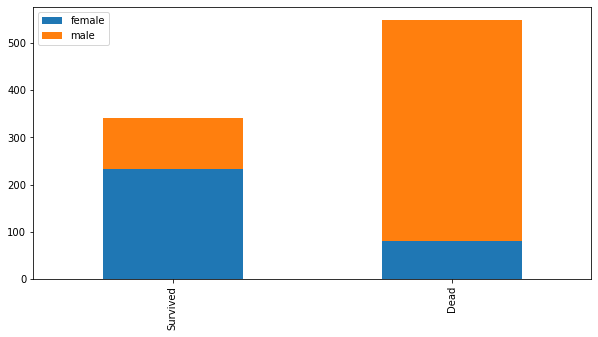

In [8]:
bar_chart('Sex')

The above bar chart shows that Women survived more than Men

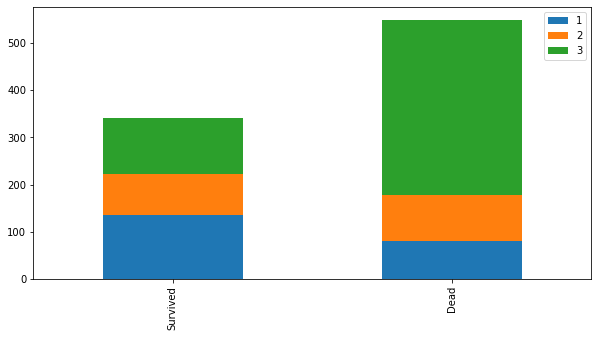

In [9]:
bar_chart('Pclass')

This chart shows that 1st class more likely survived than other classes and 3rd class more likely died than other classes

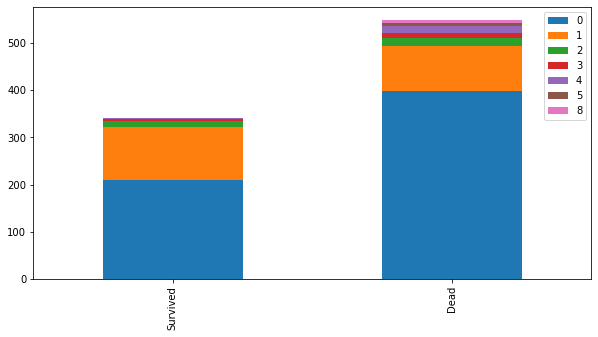

In [10]:
bar_chart('SibSp')

The above chart depicts that a person who aboarded with more than 2 SibSp more likely survived and a person who aboarded without SibSp more likely died.

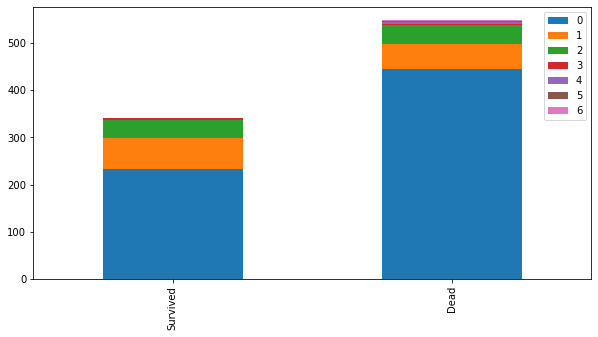

In [11]:
bar_chart('Parch')

The above chart shows that a person who aboarded with more than 2 Parch more likely survived and a person who aboarded alone more likely died.

In [12]:
df1['Age'].min(), df1['Age'].max()

(0.42, 80.0)

#### 1 -> Survived

#### 0 -> Died

### Percentage of Deaths

COUNT

In [13]:
df1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
TotalDeaths=df1['Survived'][(df1.Survived==0)].count()
TotalDeaths

549

PERCENTAGE

In [15]:
TotalDeaths * 100/len(df1)

61.61616161616162

GRAPH

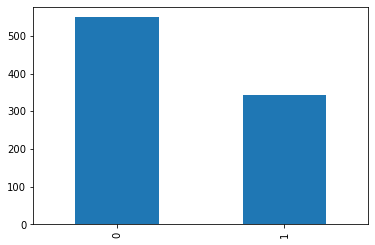

In [16]:
df1['Survived'].value_counts().plot(kind='bar');

The above graph and percentage data shows that 61.616162% people did not survived

### Gender wise Death Percentage

In [17]:
maleDeath=df1['Survived'][(df1.Sex=='male')&(df1.Survived==0)].count()
femaleDeath=df1['Survived'][(df1.Sex=='female')&(df1.Survived==0)].count()

In [18]:
maleDeathpercent=(maleDeath/TotalDeaths)*100
femaleDeathpercent=(femaleDeath/TotalDeaths)*100
print("Male Death Percent: ",maleDeathpercent)
print("Female Death Percent: ",femaleDeathpercent)

Male Death Percent:  85.24590163934425
Female Death Percent:  14.754098360655737


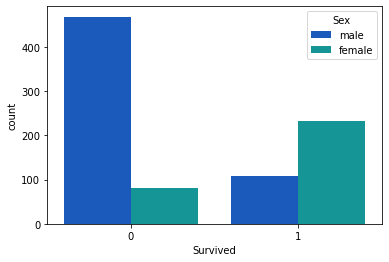

In [19]:
sns.countplot(x='Survived', hue='Sex', data=df1, palette='winter');

### Class wise Death Percentage

In [20]:
survivor_count = df1['Survived'].sum()

def get_survival_rate(dataframe, factor):
    by_factor = dataframe.groupby(factor)
    count_by_factor = by_factor['Survived'].sum()
    survival_rate = count_by_factor / survivor_count * 100
    print('Survival rates:', survival_rate, '\n \n', 'Counts: ', count_by_factor)
    return survival_rate, count_by_factor

In [21]:
total_passenger_count = len(df1['Pclass'])
first_class_count = (df1['Pclass'] == 1).sum()
second_class_count = (df1['Pclass'] == 2).sum()
third_class_count = (df1['Pclass'] == 3).sum()

per_first_class =  first_class_count / total_passenger_count * 100
per_second_class = second_class_count / total_passenger_count * 100
per_third_class = third_class_count / total_passenger_count * 100

In [22]:
print('First class percentage = ', per_first_class, ' Count: ', first_class_count)
print('Second class percentage = ', per_second_class, ' Count: ', second_class_count)
print('Third class percentage = ', per_third_class, ' Count: ', third_class_count)

First class percentage =  24.242424242424242  Count:  216
Second class percentage =  20.65095398428732  Count:  184
Third class percentage =  55.106621773288445  Count:  491


In [23]:
get_survival_rate(df1, 'Pclass')

Survival rates: Pclass
1    39.766082
2    25.438596
3    34.795322
Name: Survived, dtype: float64 
 
 Counts:  Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


(Pclass
 1    39.766082
 2    25.438596
 3    34.795322
 Name: Survived, dtype: float64,
 Pclass
 1    136
 2     87
 3    119
 Name: Survived, dtype: int64)

Conclusion from above data is as follows-:
    
    The first class represents ≈ 24% of the passengers, but ≈ 40% of the survivors
    The second class represents ≈ 20% of the passengers, but ≈ 25% of the survivors
    The third class representes ≈ 55% of the passengers, but ≈ 34% of the survivors


In [24]:
def get_counts(dataframe, factor, quality, status):
    target = dataframe[factor].where(dataframe[factor] == quality)
    class_count = target.where(dataframe['Survived'] == status).count()
    return class_count

In [25]:
class1_survival_count = get_counts(df1, 'Pclass', 1, 1)
class2_survival_count = get_counts(df1, 'Pclass', 2, 1)
class3_survival_count = get_counts(df1, 'Pclass', 3, 1)
class1_death_count = get_counts(df1, 'Pclass', 1, 0)
class2_death_count = get_counts(df1, 'Pclass', 2, 0)
class3_death_count = get_counts(df1, 'Pclass', 3, 0)

In [26]:
print('SURVIVAL COUNT BY CLASS')
print('First class survival count:', class1_survival_count)
print('Second class survival count:', class2_survival_count)
print('Third class survival count:', class3_survival_count)
print('\nCASUALTIES COUNT BY CLASS')
print('First class death count:', class1_death_count)
print('Second class death count:', class2_death_count)
print('Third class death count:', class3_death_count)

SURVIVAL COUNT BY CLASS
First class survival count: 136
Second class survival count: 87
Third class survival count: 119

CASUALTIES COUNT BY CLASS
First class death count: 80
Second class death count: 97
Third class death count: 372


In [27]:
def gen_plot(survival_array, death_array, by_factor, x_ticks):
    abs_survival_list = np.array(survival_array)
    abs_death_list = np.array(death_array)
    N = len(abs_survival_list)
    ind = np.arange(N)
    width = 1 / N

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


    # count
    ax1.bar(ind, abs_survival_list, width, label='Survival', alpha=0.8)
    ax1.bar(ind, abs_death_list, width, color='#d62728', label='Death', alpha=0.8, bottom=abs_survival_list)

    plt.sca(ax1)
    plt.xticks(ind, x_ticks)

    ax1.set_title('Absolute count ' + by_factor)
    ax1.set_ylabel('Count')
    ax1.legend(loc='upper left')

    plt.setp(plt.gca().get_xticklabels(), rotation=45)


    # Percentage
    per_survival_list = (abs_survival_list / (abs_survival_list + abs_death_list)) * 100
    per_death_list = (abs_death_list / (abs_survival_list + abs_death_list)) * 100

    ax2.bar(ind, per_survival_list, width, label='Survival percentage', alpha=0.8)
    ax2.bar(ind, per_death_list, width, color='#d62728', label='Death percentage', alpha=0.8, bottom=per_survival_list)

    plt.sca(ax2)
    plt.xticks(ind, x_ticks)

    ax2.set_title('Percentage ' + by_factor)
    ax2.set_ylabel('Percentage')

    plt.setp(plt.gca().get_xticklabels(), rotation=45)

    return plt.show()

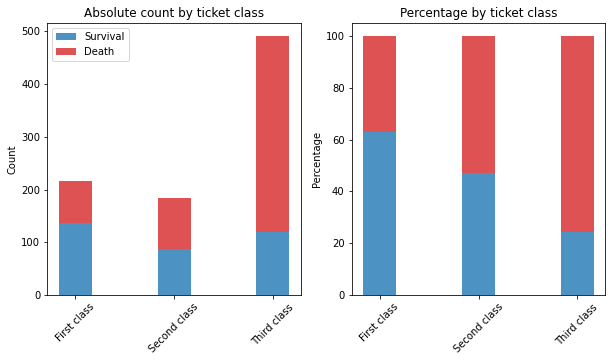

In [28]:
gen_plot([class1_survival_count, class2_survival_count, class3_survival_count],
         [class1_death_count, class2_death_count, class3_death_count],
         'by ticket class',
         ['First class', 'Second class', 'Third class'])

## Survival Chance based on who travelled alone or in group

1) For SibSp

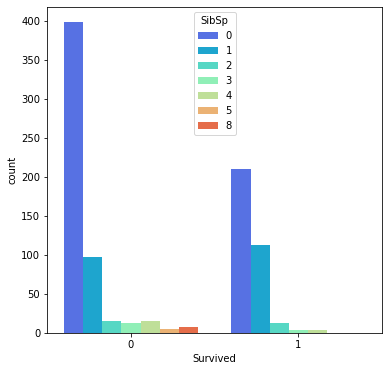

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x='Survived', hue='SibSp', data=df1, palette='rainbow');

From the above graph it can be understood that people who travelled alone had less survival chance than those who travelled in groups with their siblings and spouse.

2) For Parch

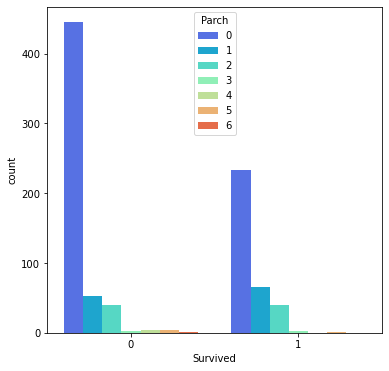

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(x='Survived', hue='Parch', data=df1, palette='rainbow');

From the above graph it can be understood that people who travelled alone had less survival chance than those who travelled in groups with their parent and children.

# 

So,from above two graphs of Sibsp wrt survived & Parch wrt Survived it is depicted that people who travelled alone had less survival chance than those who travelled in groups.

### Survival Rate based on Fare

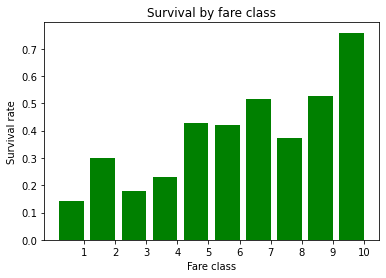

In [31]:
df1["FareClass"] = pd.qcut(df1['Fare'], 10)

# mean survival rates for all fare classes
fare_survival = df1[['FareClass', 'Survived']].groupby(['FareClass']).mean()

ind = np.arange(len(fare_survival)) 
width = 0.8
fig, ax = plt.subplots()

ax.bar(ind, fare_survival['Survived'], width, color='green')

ax.set(xlabel='Fare class', xticks=(ind + width/2), xticklabels=np.arange(1, 11), ylabel='Survival rate', 
       title='Survival by fare class')

plt.show()

It can be seen that passengers with higher fares (which corresponds with a higher class) had better chances of survival.